# Usuarios y Tweets de Junio y Agosto

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
import numpy
#print (sns.__version__)


## Levantamos todo en pala

In [3]:
df_users_junio =  pd.read_csv('data/users_junio.csv', parse_dates=['created_at'])

In [4]:
df_users_agosto =  pd.read_csv('data/users_agosto.csv', parse_dates=['created_at'])

In [5]:
df_tweets_junio =  pd.read_csv('data/tweets_junio.csv', parse_dates=['created_at'])

In [6]:
df_tweets_agosto =  pd.read_csv('data/tweets_agosto.csv', parse_dates=['created_at'])

In [10]:
uj = len(df_users_junio)
ua = len(df_users_agosto)
tj = len(df_tweets_junio)
ta = len(df_tweets_agosto)

print("Cantidad de registros")
print("Usuarios Junio: ", uj) 
print("Usuarios Agosto: ", ua) 
print("Tweets Junio: ", tj) 
print("Tweets Agosto: ", ta) 


Cantidad de registros
Usuarios Junio:  329782
Usuarios Agosto:  74324
Tweets Junio:  1041585
Tweets Agosto:  120902


In [8]:
print(tj / uj)

3.1584046430672386


In [11]:
print(ta / ua)

1.626688552822776


In [12]:
df_agosto = pd.merge(df_tweets_agosto, df_users_agosto, left_on = 'user_id', right_on = 'id', how='left')

In [13]:
df_agosto[df_agosto.followers_count > 1000000].sort_values('followers_count',  ascending=False)[:10]

,id_x,created_at_x,favorite_count,retweet_count,text,favorited,retweeted,user_name,user_id,original_id,...,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at_y,id_y,name,verified
24272,1025211470773141510,2018-08-03 02:47:16+00:00,0,0,"RT @CNNArgentina: Aborto en Argentina: ""Se red...",False,False,CNN en Español,33884545,1025211470773141510,...,En todas partes,16627820,152951,CNN en Español es tu principal fuente de infor...,825,1354,2009-04-21 12:14:47+00:00,33884545,CNN en Español,True
106872,1025408340711469056,2018-08-03 15:49:34+00:00,0,0,Hace 15 años cumplia el gran sueño de mi vida ...,False,False,Javier Mascherano,313913938,1025408340711469056,...,"Beijing, China",8019048,1094,http://www.facebook.com/Javier14Mascherano,247,45,2011-06-09 12:23:45+00:00,313913938,Javier Mascherano,True
90434,1025390834542202881,2018-08-03 14:40:00+00:00,0,0,“Con c de campeón y c de cocinera”: campaña de...,False,False,Noticias Caracol,17813487,1025390834542202881,...,Colombia,8001172,561422,Primero en Noticias.,2042,2986,2008-12-02 17:58:53+00:00,17813487,Noticias Caracol,True
88677,1025388825458225154,2018-08-03 14:32:01+00:00,0,0,Senado votará sin cambios proyecto para legali...,False,False,La Patilla,124172948,1025388825458225154,...,Venezuela,6773436,4219776,Información e Investigación. También puedes en...,148,587,2010-03-18 14:02:00+00:00,124172948,La Patilla,True
60135,1025351852165160960,2018-08-03 12:05:06+00:00,0,0,#3Ago | ANC estudiará despenalizar el aborto y...,False,False,Globovisión,17485551,1025351852165160960,...,Venezuela,4763443,1215368,"#Globovisión, información responsable y veraz....",2611,638,2008-11-19 13:22:39+00:00,17485551,Globovisión,True
109842,1025410972536590337,2018-08-03 16:00:01+00:00,0,0,#Nacionales | ANC estudiará despenalizar el ab...,False,False,Globovisión,17485551,1025410972536590337,...,Venezuela,4763443,1215368,"#Globovisión, información responsable y veraz....",2611,638,2008-11-19 13:22:39+00:00,17485551,Globovisión,True
27136,1025214947431784448,2018-08-03 03:01:05+00:00,0,0,Aborto legal: otro senador indeciso anunció qu...,False,False,TN - Todo Noticias,25992212,1025214947431784448,...,Argentina,4611739,289971,"Noticias las 24 horas, por el canal líder en a...",121,4,2009-03-23 12:35:07+00:00,25992212,TN - Todo Noticias,True
81326,1025380179349307392,2018-08-03 13:57:40+00:00,0,0,Chef venezolano cocinó arepas para el presiden...,False,False,El Nacional,15007299,1025380179349307392,...,Caracas - Venezuela,4535104,6082095,Te informamos sobre las noticias más recientes...,358611,6729,2008-06-04 17:03:00+00:00,15007299,El Nacional,True
83136,1025382289486897153,2018-08-03 14:06:03+00:00,0,0,Un joven argentino le entregó al Papa un pañue...,False,False,eltrece,175824869,1025382289486897153,...,Argentina,3965338,123234,Twitter oficial de #eltrece. Prendete a nuestr...,834,1162,2010-08-07 18:37:12+00:00,175824869,eltrece,True
112815,1025413735366709248,2018-08-03 16:11:00+00:00,0,0,🎥 [#ARGENTINA] Cristina Fernández citada a dec...,False,False,NTN24,133945128,1025413735366709248,...,Continente Americano,3847228,304857,Conectamos las realidades de los latinos con e...,223,103,2010-04-17 02:08:10+00:00,133945128,NTN24,True


In [14]:
df_agosto[df_agosto.user_id == 33884545]

,id_x,created_at_x,favorite_count,retweet_count,text,favorited,retweeted,user_name,user_id,original_id,...,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at_y,id_y,name,verified
24272,1025211470773141510,2018-08-03 02:47:16+00:00,0,0,"RT @CNNArgentina: Aborto en Argentina: ""Se red...",False,False,CNN en Español,33884545,1025211470773141510,...,En todas partes,16627820,152951,CNN en Español es tu principal fuente de infor...,825,1354,2009-04-21 12:14:47+00:00,33884545,CNN en Español,True


### Merge de Junio

In [15]:
df_junio = pd.merge(df_tweets_junio, df_users_junio, left_on = 'user_id', right_on = 'id', how='left')

In [16]:
df_junio[df_junio.followers_count > 100000].sort_values('followers_count',  ascending=False).count()

id_x                2257
created_at_x        2257
favorite_count      2257
retweet_count       2257
full_text           2257
posicion            2257
favorited           2257
retweeted           2257
user_name           2257
user_id             2257
original_id         2257
screen_name         2257
location            1696
followers_count     2257
statuses_count      2257
description         2093
friends_count       2257
favourites_count    2257
created_at_y        2257
id_y                2257
name                2257
verified            2257
dtype: int64

In [28]:
df_junio[df_junio.user_id == 789856765]

,id_x,created_at_x,favorite_count,retweet_count,full_text,posicion,favorited,retweeted,user_name,user_id,...,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at_y,id_y,name,verified
86727,1006322670164733952,2018-06-11 23:49:55+00:00,0,7722,RT @marley_ok: Argentina tiene que avanzar! El...,si,False,False,marcelo tinelli,789856765,...,Buenos aires,10265980,52999,"Periodista, Productor de Contenidos Multimedia...",379,12625,2012-08-29 18:05:27+00:00,789856765,marcelo tinelli,True
266213,1006305004561592320,2018-06-11 22:39:43+00:00,0,4651,"RT @ElchuecoSuar: El aborto existió, existe y ...",si,False,False,marcelo tinelli,789856765,...,Buenos aires,10265980,52999,"Periodista, Productor de Contenidos Multimedia...",379,12625,2012-08-29 18:05:27+00:00,789856765,marcelo tinelli,True


In [33]:
df_tweets_junio[df_tweets_junio.id != df_tweets_junio.original_id ]

,id,created_at,favorite_count,retweet_count,full_text,posicion,favorited,retweeted,user_name,user_id,original_id


In [36]:
df_tweets_junio[df_tweets_junio.id == df_tweets_junio.original_id ].count()

id                1041585
created_at        1041585
favorite_count    1041585
retweet_count     1041585
full_text         1041585
posicion          1041585
favorited         1041585
retweeted         1041585
user_name         1041529
user_id           1041585
original_id       1041585
dtype: int64

In [41]:
df_users_junio[df_users_junio.verified].followers_count

580         11693
1578       262695
3201       383665
3213       249071
4116        41003
4345       289880
4411        98604
4576      2308222
5258       177786
5267        67952
5519      3039071
5599       318262
5752         1257
5754        12084
6732         8794
6955        16073
6969       947627
7576         7599
8635         8669
8705        14618
9485       244059
10069       17900
10177      114166
10341        4742
11417       15750
11421       87314
12725      153656
12820        8100
13126       26962
13554      163489
           ...   
316944      27161
317312      70365
318070       6201
318281       2878
318492       6085
318673      11490
319665       4535
319837     172198
319987    5662524
320596     111999
321824     209610
322328      12955
322458       4353
324056      19709
324133      10728
324366      18986
324410     260633
324880      13559
325500       9766
326000       4094
326764       1117
327328       4409
327520       6502
327887     300989
328140    

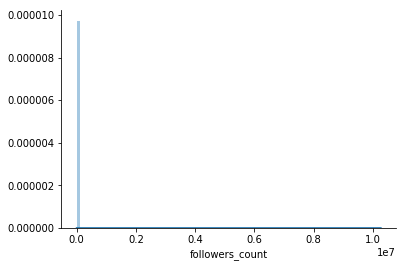

In [44]:
sns.distplot(df_users_junio['followers_count'], bins=100)
sns.despine()

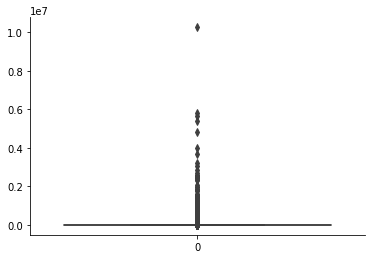

In [45]:
sns.boxplot(data=df_users_junio['followers_count'])
sns.despine()

In [65]:
promedio_tweets_uv = df_junio[df_junio['verified']].groupby('user_id').count()['id_x'].mean()
promedio_tweets_unv = df_junio[df_junio['verified'] != True].groupby('user_id').count()['id_x'].mean()

print(promedio_tweets_uv, promedio_tweets_unv)


6.743169398907104 3.1504300258319407


In [68]:
df_tweets_agosto[df_tweets_agosto.id == df_tweets_agosto.original_id ].describe()

,id,favorite_count,retweet_count,user_id,original_id
count,1.209020e+05,120902.0,120902.0,1.209020e+05,1.209020e+05
mean,1.025314e+18,0.0,0.0,2.556739e+17,1.025314e+18
std,8.503283e+13,0.0,0.0,4.092247e+17,8.503283e+13
min,1.025181e+18,0.0,0.0,7.802810e+05,1.025181e+18
25%,1.025220e+18,0.0,0.0,3.366145e+08,1.025220e+18
50%,1.025353e+18,0.0,0.0,1.737213e+09,1.025353e+18
75%,1.025391e+18,0.0,0.0,7.526667e+17,1.025391e+18
max,1.025420e+18,0.0,0.0,1.025411e+18,1.025420e+18


In [44]:
 df_users_agosto.head(10)


,screen_name,location,followers_count,statuses_count,description,friends_count,favourites_count,created_at,id,name,verified
0,abortoensenado,"Buenos Aires, Argentina",619,1028,Sólo hay una cosa más grande que el amor a la ...,1264,305,2018-06-20 17:12:43+00:00,1009484201660383232,Aborto En El Senado,False
1,MotonetaZ,NaN,12,265,None,66,189,2017-06-15 20:07:02+00:00,875444558745567232,Lucas,False
2,AliseValix0210,NaN,34,3218,"ARMY ,❤ BTS ❤, HAY QUE AMARLOS A TODOS.",92,5076,2017-11-20 23:30:37+00:00,932753072681517058,Alise,False
3,MilenaDiser27,NaN,28,106,artist👩🏻‍🎨🎸🎶 🖤AHS🖤 cuenta nueva🤙🏽🔥 snap👻: mile...,114,113,2018-06-11 01:46:56+00:00,1005989729542733827,FREAK👽,False
4,ConLaGenteRos,"Rosario, Argentina",2325,15230,Diario digital de Rosario,449,28,2017-12-10 21:06:45+00:00,939964624711057412,Con La Gente,False
5,MelinaAlmada5,Matorrales,167,2519,La revolución será feminista o no será,147,1473,2017-09-28 01:54:38+00:00,913220372136329221,ᗰEᒪIᑎᗩ 💚💜💚,False
6,candv6,makdonalS,1763,2194,re torta y?,5001,1954,2018-02-26 21:16:48+00:00,968233410870247430,cande;,False
7,CharlyCarlos10,"Salta, Argentina",115,5092,None,103,25907,2016-06-21 17:10:24+00:00,745302861815349249,Charly I.,False
8,agusnhh,sAnmi,371,16080,23 h 06 n,428,10395,2017-12-29 22:25:34+00:00,946869830241615880,kumbia peposa 🇫🇷,False
9,Ivanlorenz_,NaN,384,7714,Egresado del Colegio Nacional de Buenos Aires ...,380,6530,2016-02-25 23:00:20+00:00,702991546208092169,Lolo,False


In [84]:
import numpy.distutils.system_info as sysinfo
print("Version de numpy!",sysinfo.platform_bits , "bits")

Version de numpy! 64 bits


In [12]:
type(df_tweets_agosto)

pandas.core.frame.DataFrame

In [14]:
df_tweets_agosto.describe()


,id,favorite_count,retweet_count,user_id,original_id
count,1.209020e+05,120902.0,120902.0,1.209020e+05,1.209020e+05
mean,1.025314e+18,0.0,0.0,2.556739e+17,1.025314e+18
std,8.503283e+13,0.0,0.0,4.092247e+17,8.503283e+13
min,1.025181e+18,0.0,0.0,7.802810e+05,1.025181e+18
25%,1.025220e+18,0.0,0.0,3.366145e+08,1.025220e+18
50%,1.025353e+18,0.0,0.0,1.737213e+09,1.025353e+18
75%,1.025391e+18,0.0,0.0,7.526667e+17,1.025391e+18
max,1.025420e+18,0.0,0.0,1.025411e+18,1.025420e+18


In [23]:
print(df_junio.shape, df_tweets_junio.shape)

(1041585, 22) (1041585, 11) (329782, 11)


In [24]:
print(df_agosto.shape, df_tweets_agosto.shape)

(120902, 21) (120902, 10)


In [28]:
print(df_junio.followers_count.min(), df_junio.followers_count.max())

0 10265980


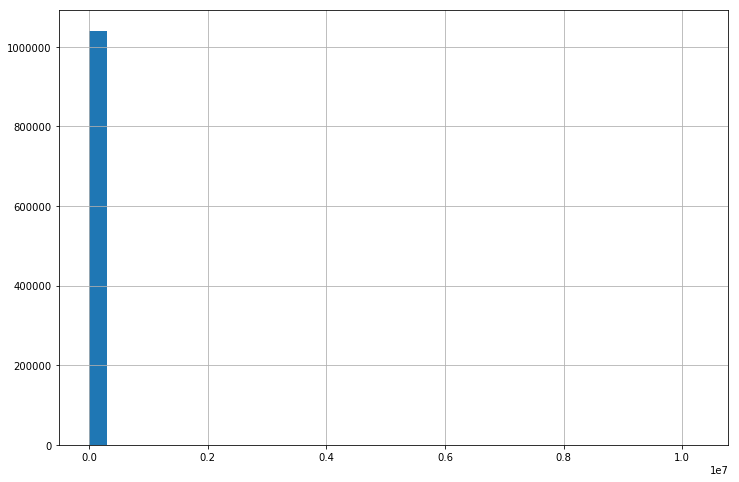

In [35]:
df_junio.followers_count.hist( bins=35, figsize=(12,8));

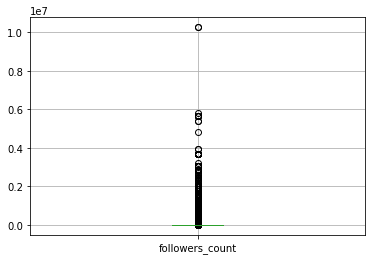

In [30]:
df_junio.boxplot(column='followers_count');

### Usuarios (no duplicados)
Quitamos los duplicados por la columna ID, y unimos los 2 datasets en uno de usuarios.

In [60]:
df_users = pd.concat([df_users_junio, df_users_agosto]).drop_duplicates(subset='id').reset_index(drop=True)

In [65]:
print('filas:',df_users.shape[0], '=',df_users_junio.shape[0], '+' , df_users_agosto.shape[0] )
print('duplicados:', (df_users_junio.shape[0] + df_users_agosto.shape[0]) - df_users.shape[0])

filas: 370486 = 329782 + 74324
duplicados: 33620


In [79]:
fw = df_users['followers_count']
mask_fw = numpy.abs(fw-fw.mean()) <= (1.5*fw.std())
data =fw[mask_fw]
print("Filas removidas", fw.count() - data.count())
print("Folowers máximo considerado", data.max())

Filas removidas 734
Folowers máximo considerado 85425


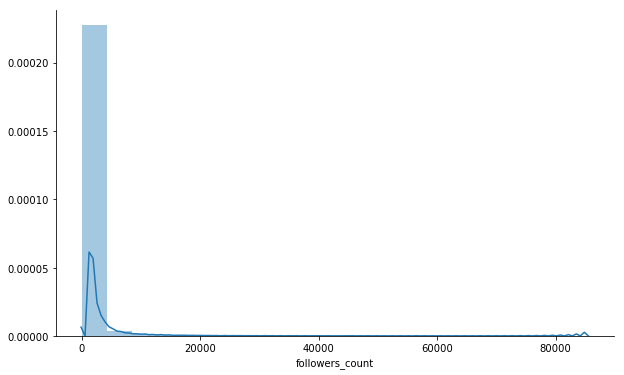

In [80]:
plt.figure(figsize=(10,6))
sns.distplot(data, bins=20)
sns.despine()

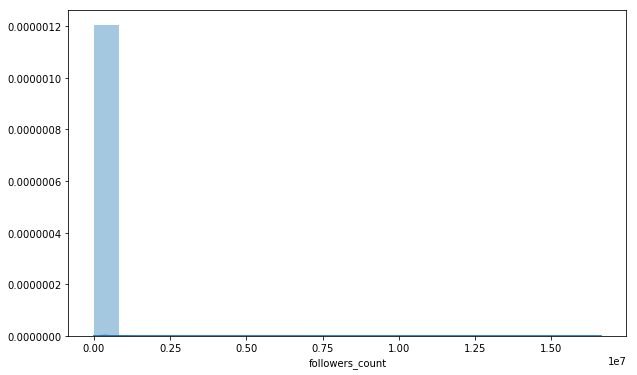

In [103]:
plt.figure(figsize=(10,6))
sns.distplot(df_users['followers_count'], bins=20)


### Seguidores y seguidos

El 75% de los usuarios, tiene en promedio 748 seguidores

In [110]:
df_users['followers_count'].quantile(q=[.25,.5,.75])

0.25    114.0
0.50    323.0
0.75    748.0
Name: followers_count, dtype: float64

In [104]:
 df_users['followers_count'].describe()

count    3.704860e+05
mean     1.979009e+03
std      5.567966e+04
min      0.000000e+00
25%      1.140000e+02
50%      3.230000e+02
75%      7.480000e+02
max      1.662782e+07
Name: followers_count, dtype: float64

In [136]:
df_users['followers_count'].quantile(q=[.998245])

0.998245    100224.55065
Name: followers_count, dtype: float64

In [138]:
print('El ',100 - 99.8245,'% de los usuarios tiene + de 100 mil seguidores!' )

El  0.17549999999999955 % de los usuarios tiene + de 100 mil seguidores!


#### ahora vamos con los amigos (a quien sigue)

In [145]:
 df_users['friends_count'].describe()

count    3.704860e+05
mean     7.186879e+02
std      3.874823e+03
min      0.000000e+00
25%      1.850000e+02
50%      3.680000e+02
75%      7.170000e+02
max      1.047219e+06
Name: friends_count, dtype: float64

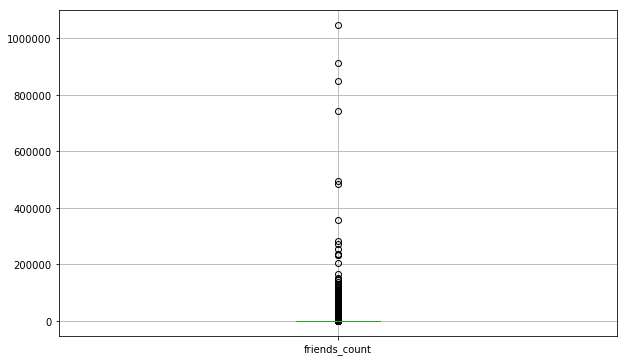

In [146]:
 df_users.boxplot(column='friends_count');

In [147]:
df_users['friends_count'].quantile(q=[.25,.5,.75])

0.25    185.0
0.50    368.0
0.75    717.0
Name: friends_count, dtype: float64

## Pregunta Nro 2 (creacion de cuentas)

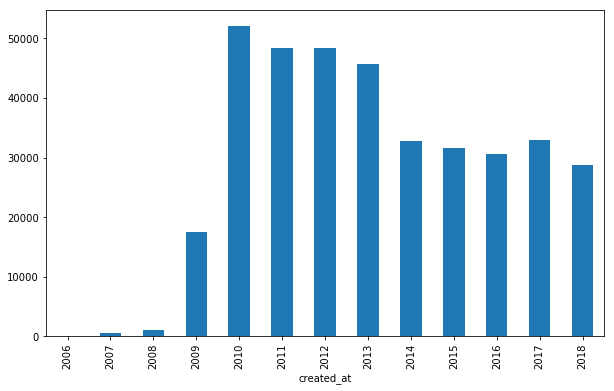

In [148]:
df_users["created_at"].groupby(df_users["created_at"].dt.year).count().plot(kind="bar")
plt.show()

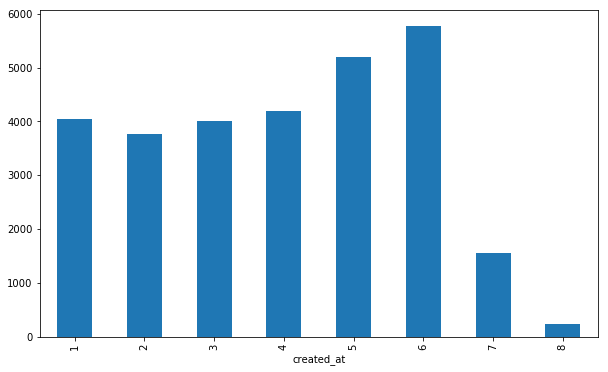

In [151]:
import datetime 
df_users[df_users["created_at"].dt.year >= 2018]["created_at"].groupby(df_users["created_at"].dt.month).count().plot(kind="bar")
plt.show()

#### Si vemos una alza en altas  en los meses de mayo y junio!

In [158]:
df_users[df_users["created_at"].dt.year >= 2018].groupby(df_users["created_at"].dt.month)['id'].count()


created_at
1    4046
2    3773
3    4016
4    4187
5    5189
6    5775
7    1558
8     238
Name: id, dtype: int64

## Antigüedad vs cantidad de tweets

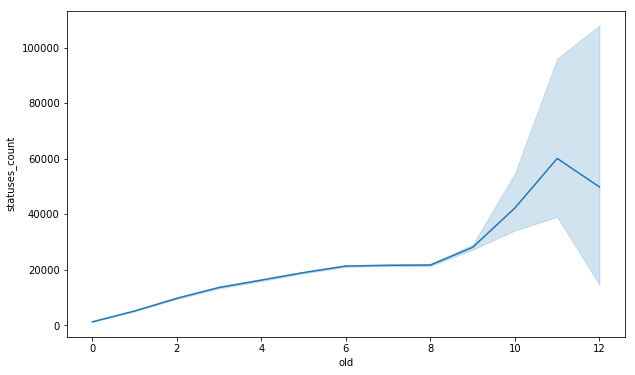

In [192]:
df_users['old'] =  2018 - df_users["created_at"].dt.year
sns.lineplot(data=df_users, x='old',y='statuses_count')

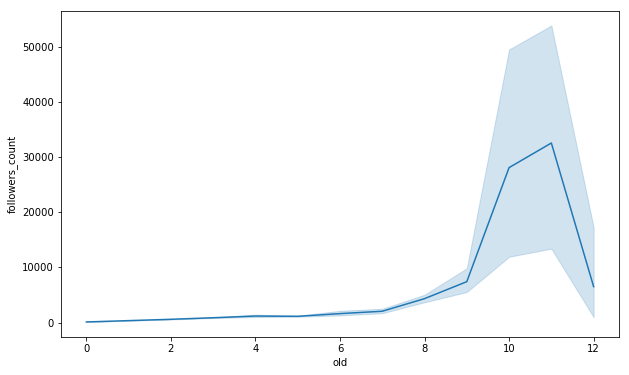

In [196]:
sns.lineplot(data=df_users, x='old',y='followers_count')
 

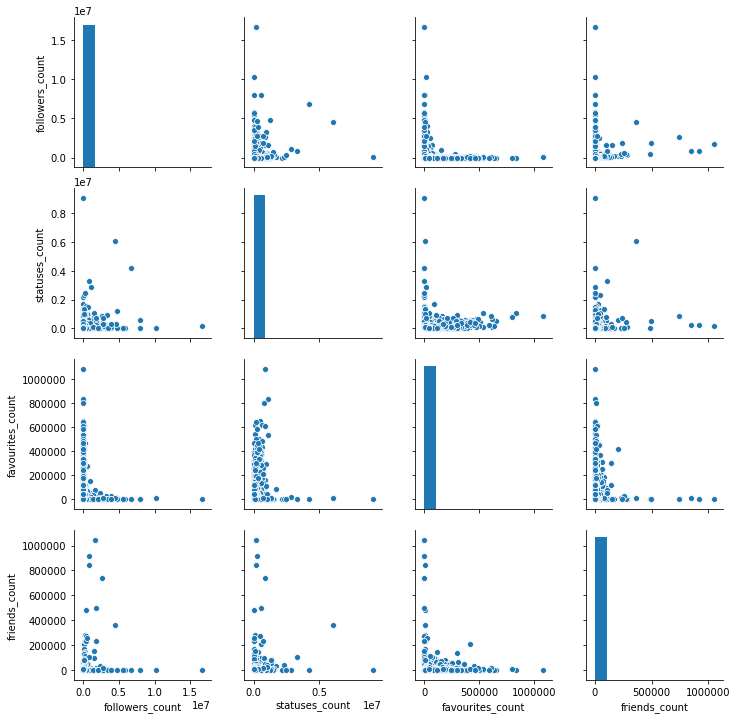

In [198]:
sns.pairplot(
    data=df_users,
    vars=['followers_count', 'statuses_count', 'favourites_count', 'friends_count'])

sns.despine()

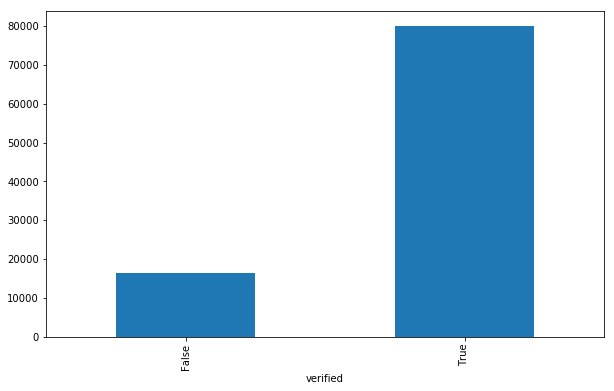

In [204]:
df_users.groupby(df_users["verified"])['statuses_count'].mean().plot(kind="bar")
plt.show()


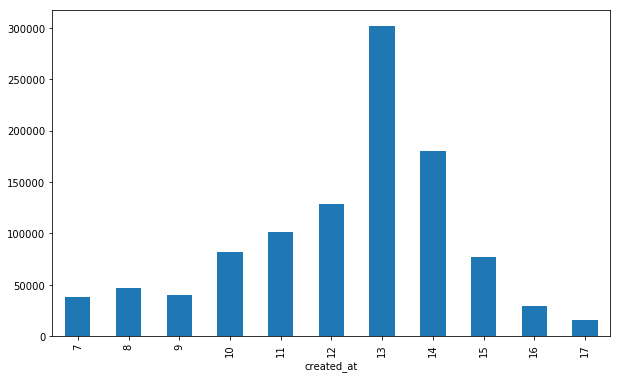

In [209]:
df_tweets_junio["created_at"].groupby(df_tweets_junio["created_at"].dt.day).count().plot(kind="bar")
plt.show()

### Cantidad de tweets x hora de creacion (dia de la votacion en junio y agosto)

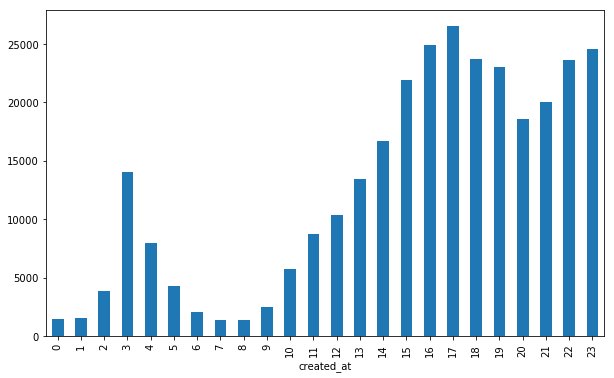

In [212]:
df_tweets_junio[df_tweets_junio.created_at.dt.day == 13]["created_at"].groupby(df_tweets_junio["created_at"].dt.hour).count().plot(kind="bar")
plt.show()

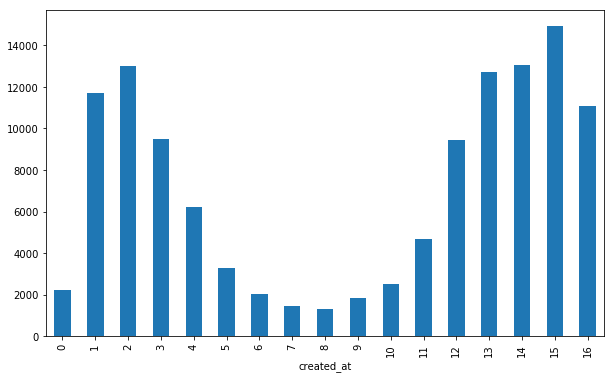

In [211]:
df_tweets_agosto["created_at"].groupby(df_tweets_agosto["created_at"].dt.hour).count().plot(kind="bar")
plt.show()

In [219]:
def to_categorical(column):
    intervals = pd.IntervalIndex.from_tuples([(0, 100), (100, 500), (500, 1000), (1000,5000), (5000,10000),(10000,20000),(20000,50000),(50000, 100000), (100000, 200000), (200000, 500000), (500000,1000000), (1000000,20000000)])
    return pd.cut(column, intervals)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

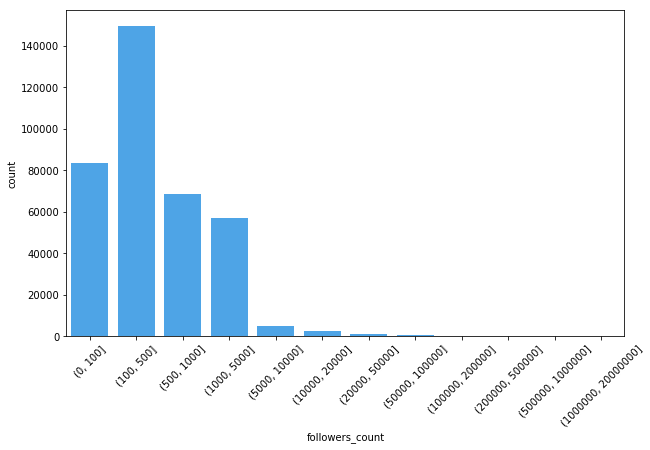

In [221]:
sns.countplot(to_categorical(df_users.followers_count), color='#35A7FF')
plt.xticks(rotation=45)

### usuarios verificados y no verificados vs seguidores

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

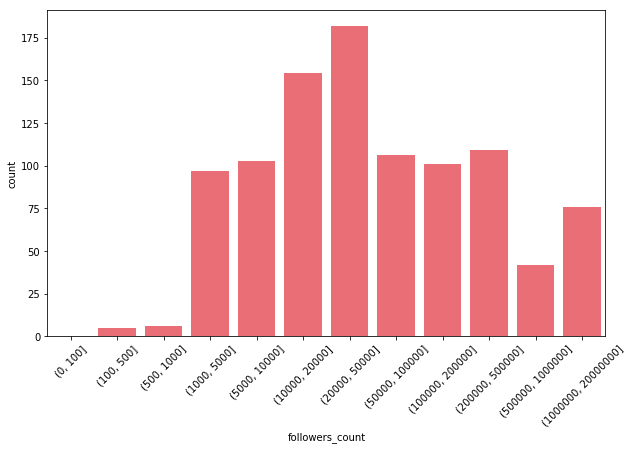

In [229]:
sns.countplot(to_categorical(df_users[df_users.verified == True].followers_count), color='#FF5964')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

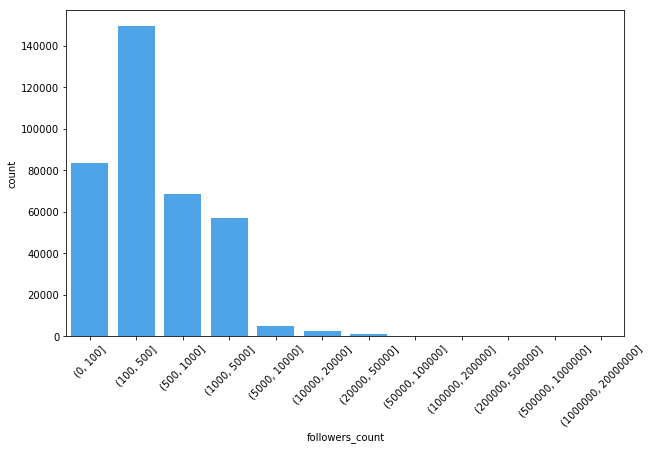

In [230]:
sns.countplot(to_categorical(df_users[df_users.verified == False].followers_count), color='#35A7FF')
plt.xticks(rotation=45)